In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

In [ ]:
# Load the datasets
customers = pd.read_csv("/content/Customers.csv")
transactions = pd.read_csv("/content/Transactions.csv")
products = pd.read_csv("/content/Products.csv")


In [48]:
# Merge datasets to get customer and transaction data
merged_data = transactions.merge(customers, on="CustomerID")

In [49]:
merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11


In [50]:

# Optional: Drop irrelevant columns (e.g., names or IDs if not needed for clustering)
# Here, we keep CustomerID for reference but drop it during clustering
customer_ids = merged_data["CustomerID"]
merged_data.drop(["CustomerID"], axis=1, inplace=True)



In [52]:
# Select only numerical columns
numerical_columns = merged_data.select_dtypes(include=['number']).columns
numerical_data = merged_data[numerical_columns]

In [66]:
numerical_data

,Quantity,TotalValue,Price,Cluster,PCA1,PCA2
0,1,300.68,300.68,1,-1.076469,-1.181433
1,1,300.68,300.68,1,-1.076469,-1.181433
2,1,300.68,300.68,1,-1.076469,-1.181433
3,2,601.36,300.68,1,-0.237732,-0.496515
4,3,902.04,300.68,3,0.601006,0.188402
...,...,...,...,...,...,...
995,1,459.86,459.86,1,-0.236690,-1.910754
996,3,1379.58,459.86,3,1.898616,-0.539843
997,4,1839.44,459.86,3,2.966269,0.145613
998,2,919.72,459.86,1,0.830963,-1.225298


In [54]:
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_data)

# Convert scaled features back to a DataFrame for easier visualization
scaled_data = pd.DataFrame(scaled_features, columns=numerical_columns)

In [55]:
# Check if categorical columns need encoding (if relevant to clustering)
categorical_columns = merged_data.select_dtypes(include=['object']).columns
if not categorical_columns.empty:
    print("Non-numerical columns detected:", list(categorical_columns))

Non-numerical columns detected: ['TransactionID', 'ProductID', 'TransactionDate', 'CustomerName', 'Region', 'SignupDate']


In [56]:
# One-hot encode categorical columns
encoded_data = pd.get_dummies(merged_data[categorical_columns], drop_first=True)

# Combine scaled numerical data and encoded categorical data
processed_data = pd.concat([scaled_data, encoded_data], axis=1)


In [65]:
processed_data

,Quantity,TotalValue,Price,TransactionID_T00002,TransactionID_T00003,TransactionID_T00004,TransactionID_T00005,TransactionID_T00006,TransactionID_T00007,TransactionID_T00008,...,SignupDate_2024-11-07,SignupDate_2024-11-11,SignupDate_2024-11-13,SignupDate_2024-11-15,SignupDate_2024-11-18,SignupDate_2024-11-22,SignupDate_2024-12-28,Cluster,PCA1,PCA2
0,-1.375488,-0.789850,0.199948,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,1,-1.076469,-1.181433
1,-1.375488,-0.789850,0.199948,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,1,-1.076469,-1.181433
2,-1.375488,-0.789850,0.199948,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,1,-1.076469,-1.181433
3,-0.480571,-0.179825,0.199948,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,1,-0.237732,-0.496515
4,0.414347,0.430200,0.199948,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,3,0.601006,0.188402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.375488,-0.466903,1.331565,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,1,-0.236690,-1.910754
996,0.414347,1.399041,1.331565,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,3,1.898616,-0.539843
997,1.309264,2.332014,1.331565,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,3,2.966269,0.145613
998,-0.480571,0.466069,1.331565,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,1,0.830963,-1.225298


In [57]:
# Clustering
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
processed_data["Cluster"] = clusters

In [62]:
# Evaluation Metrics
db_index = davies_bouldin_score(scaled_features, clusters)
silhouette_avg = silhouette_score(scaled_features, clusters)

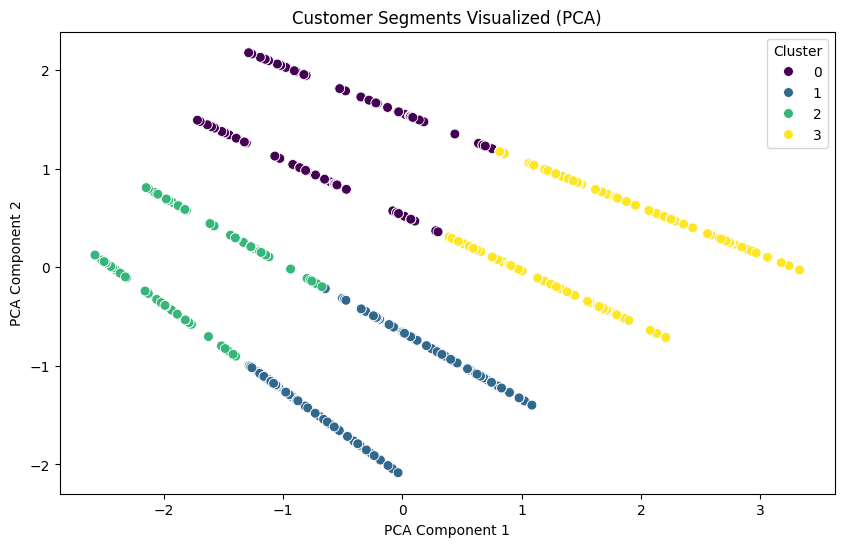

Davies-Bouldin Index: 0.743702940359571
Silhouette Score: 0.4680372654818964


In [63]:
# Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
processed_data["PCA1"] = pca_result[:, 0]
processed_data["PCA2"] = pca_result[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=processed_data, x="PCA1", y="PCA2", hue="Cluster", palette="viridis", s=50)
plt.title("Customer Segments Visualized (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

# Print Results
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")